## Importado de librerias

In [1]:
import auxiliary_fun
import Dacquisition
import DprepNcleaning
import eda
import Mbuilding
import dtale
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt 

## 1: Adquisición de Datos

In [2]:
data = Dacquisition.d_acquisition(1)

# 2: Selección de Variable Diana

In [3]:
data, target_column, target_type, scewed_target_col = Dacquisition.var_acquisition(data, 4, CHECK=False) #tema de dataNaN y dataCLEAN juntar

Target column is: Días_hasta_Salida_ERCA



# 3: Casteo de Datos

In [4]:
data, rosseta = auxiliary_fun.d_cast(data, target_column)

   Edad  Sexo  Tipo_obesidad  BMI_basal  Días_hasta_Salida_ERCA  Creat_Basal  \
0    80     2              3  48.888889                   301.0         3.65   
2    65     2              3  45.843645                   295.0         3.81   
3    79     2              3  45.013850                   526.0         2.87   
4    44     2              3  44.531250                   639.0         3.91   
5    69     2              3  43.750000                    83.0         4.41   

   FG_Basal  RAC_Basal  ProtCreat_Basal  Hb_Basal  IST_Basal  Urico_Basal  \
0      11.0       85.0              NaN      12.5       14.2          7.3   
2      12.0        NaN          12442.0      11.1       15.5          7.6   
3      15.0     1163.0           2107.0      11.8       18.9          6.1   
4      13.0      401.0            729.0      12.6       18.3          7.5   
5      10.0       62.0            428.0      10.2       21.2          9.0   

   ColT_Basal  LDL_Basal  TG_Basal  Alb_Basal  Ca_Basal 

# 4: Limpieza de Datos

In [5]:
data, drop_col, drop_row = DprepNcleaning.data_cleaning(data, min_porcentage_col = 10, min_porcentage_row = 0)
print(colored('\nThe result of the number of patients is: '+str(len(data)), 'red', attrs=['bold']))


Resultado de Data Cleaning:
  Cantidad de columnas eliminadas: 3 of 19 (15.79%)
  Cantidad de filas eliminadas: 54 of 152 (35.53%)

The result of the number of patients is: 98


# 5: Análizis Exploratorio de Datos

In [6]:
    ### Exploratory Data Analyzis (MANUAL)###
manualEDA, missing4rows = eda.ManualEDAfun(data) #data no tiene a predicted column
print(colored('\nTable with information of the variables:', 'red', attrs=['bold']))
print(colored(manualEDA, 'red'))
print(colored('\nTable with information of the rows:', 'red', attrs=['bold']))
print(colored(missing4rows, 'red'))

    ### Exploratory Data Analyzis (AUTO)###
data_decasted_aux = auxiliary_fun.de_cast_PREDICTION(data, data.columns, rosseta)  
dtale.show(data_decasted_aux) #hacerle decast !!!!!
dtale.show(open_browser=True)


Table with information of the variables:
               Column name  Distinct  Distinct (%)  Missing  Missing (%)  \
0                     Edad        40     40.816327        0            0   
1                     Sexo         2      2.040816        0            0   
2            Tipo_obesidad         3      3.061224        0            0   
3   Días_hasta_Salida_ERCA        85     86.734694        0            0   
4              Creat_Basal        91     92.857143        0            0   
5                 FG_Basal        19     19.387755        0            0   
6                 Hb_Basal        46     46.938776        0            0   
7                IST_Basal        82     83.673469        0            0   
8              Urico_Basal        59     60.204082        0            0   
9               ColT_Basal        69     70.408163        0            0   
10               LDL_Basal        67     68.367347        0            0   
11                TG_Basal        81     82.65

c:\Users\tomas\TESISS\auxiliary_fun.py:115: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



# Entrenamiento de Modelos

c:\Users\tomas\TESISS\Mbuilding.py:197: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

c:\Users\tomas\TESISS\Mbuilding.py:198: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.




Table with information of scores of the models:
              Target column  Taget type           Model name  \
0    Días_hasta_Salida_ERCA  continuous     LinearRegression   
2    Días_hasta_Salida_ERCA  continuous     LinearRegression   
1    Días_hasta_Salida_ERCA  continuous     LinearRegression   
129  Días_hasta_Salida_ERCA  continuous    QuantileRegressor   
130  Días_hasta_Salida_ERCA  continuous    QuantileRegressor   
131  Días_hasta_Salida_ERCA  continuous    QuantileRegressor   
202  Días_hasta_Salida_ERCA  continuous    QuantileRegressor   
201  Días_hasta_Salida_ERCA  continuous    QuantileRegressor   
203  Días_hasta_Salida_ERCA  continuous    QuantileRegressor   
236  Días_hasta_Salida_ERCA  continuous            LassoLars   
235  Días_hasta_Salida_ERCA  continuous            LassoLars   
234  Días_hasta_Salida_ERCA  continuous            LassoLars   
216  Días_hasta_Salida_ERCA  continuous     LinearRegression   
217  Días_hasta_Salida_ERCA  continuous     LinearRegre

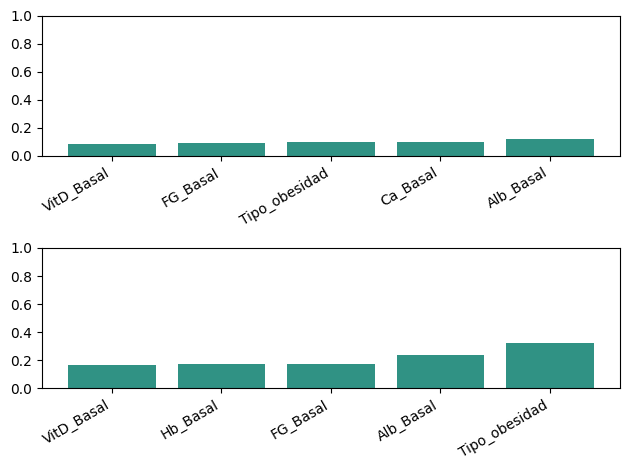

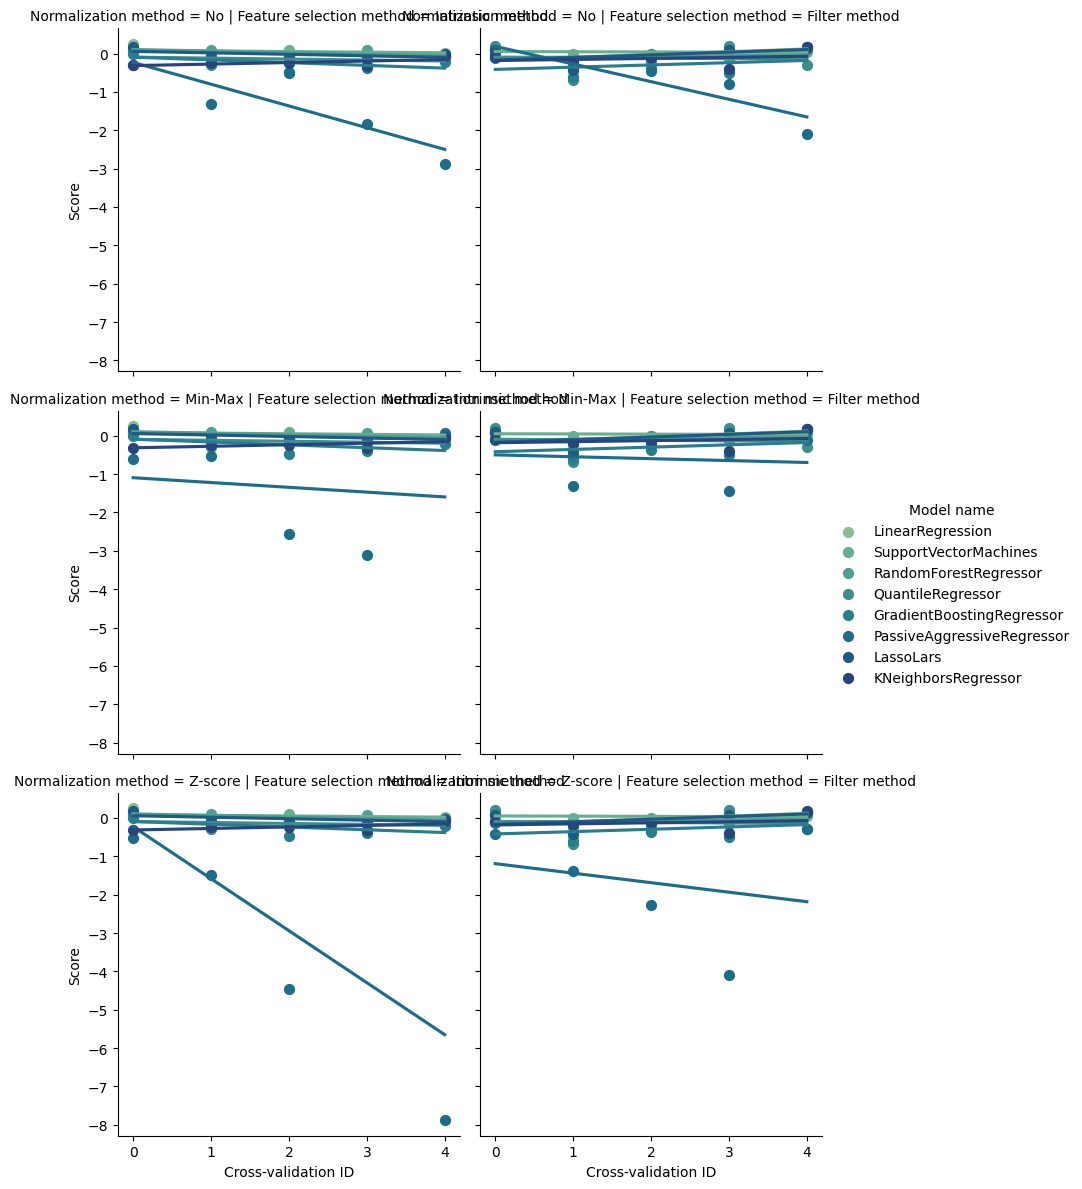

In [7]:
    ### Step 5: Model Building       
model_info, trained_models, fig1, fig2, fig3 = Mbuilding.model_shake(DATA=data, TARGET_COLUMN=target_column, TARGET_TY=target_type)
# model_return, ALL_TRAINED_MODELS, figure_features, fig_ROC, figure_CM
sns.lmplot(
    data=model_info, x="Cross-validation ID", y="Score", row="Normalization method", col="Feature selection method", hue='Model name',
    palette="crest", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
plt.show()